# T20 worlcup analysis

**Importing libraries**

In [16]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"
import matplotlib.pyplot as plt


**Loading Dataset**

In [4]:
data = pd.read_csv('/content/t20-world-cup-22.csv')
data.head()

,venue,team1,team2,stage,toss winner,toss decision,first innings score,first innings wickets,second innings score,second innings wickets,winner,won by,player of the match,top scorer,highest score,best bowler,best bowling figure
0,SCG,New Zealand,Australia,Super 12,Australia,Field,200.0,3.0,111.0,10.0,New Zealand,Runs,Devon Conway,Devon Conway,92.0,Tim Southee,3-6
1,Optus Stadium,Afghanistan,England,Super 12,England,Field,112.0,10.0,113.0,5.0,England,Wickets,Sam Curran,Ibrahim Zadran,32.0,Sam Curran,5-10
2,Blundstone Arena,Ireland,Sri lanka,Super 12,Ireland,Bat,128.0,8.0,133.0,1.0,Sri lanka,Wickets,Kusal Mendis,Kusal Mendis,68.0,Maheesh Theekshana,2-19
3,MCG,Pakistan,India,Super 12,India,Field,159.0,8.0,160.0,6.0,India,Wickets,Virat Kohli,Virat Kohli,82.0,Hardik Pandya,3-30
4,Blundstone Arena,Bangladesh,Netherlands,Super 12,Netherlands,Field,144.0,8.0,135.0,10.0,Bangladesh,Runs,Taskin Ahmed,Colin Ackermann,62.0,Taskin Ahmed,4-25


In [6]:
data.shape


(33, 17)

In [7]:
data.columns

Index(['venue', 'team1', 'team2', 'stage', 'toss winner', 'toss decision',
       'first innings score', 'first innings wickets', 'second innings score',
       'second innings wickets', 'winner', 'won by', 'player of the match',
       'top scorer', 'highest score', 'best bowler', 'best bowling figure'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   venue                   33 non-null     object 
 1   team1                   33 non-null     object 
 2   team2                   33 non-null     object 
 3   stage                   33 non-null     object 
 4   toss winner             30 non-null     object 
 5   toss decision           30 non-null     object 
 6   first innings score     30 non-null     float64
 7   first innings wickets   30 non-null     float64
 8   second innings score    30 non-null     float64
 9   second innings wickets  30 non-null     float64
 10  winner                  29 non-null     object 
 11  won by                  29 non-null     object 
 12  player of the match     29 non-null     object 
 13  top scorer              30 non-null     object 
 14  highest score           30 non-null     floa

In [11]:
data.drop_duplicates(inplace = True)
data.shape

# it means there are no duplicate values

(33, 17)

**Number of matches won by each team in the world cup**

In [12]:
figure = px.bar(data, data['winner'], title = "Number of matches won by each team in worldcup 2022")
figure.show()

England won most matches as they also won the Final, followed by India and Pakistan

**Number of matches won by batting first or second in the t20 world cup 2022**

In [20]:
won_by = data["won by"].value_counts()
won_by

Runs       16
Wickets    13
Name: won by, dtype: int64

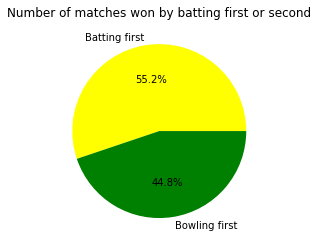

In [23]:
x = ['Batting first', 'Bowling first']
y = [16, 13]

plt.pie(y, labels = x, autopct = '%0.1f%%', colors = ['yellow', 'green'])
plt.title("Number of matches won by batting first or second")
plt.show()

55% Matches (16 matches) were won by batting first and remaining 44% (13 matches) were won by bowling first 

**Toss Decisions**

In [25]:
toss = data['toss decision'].value_counts()
toss

Bat      17
Field    13
Name: toss decision, dtype: int64

In [27]:
df = pd.DataFrame(toss)
df

,toss decision
Bat,17
Field,13


So in 17 matches, the teams decided to bat first, and in 13 matches, the teams chose to field first

In [26]:
x = ['Bat', 'Field']
y = [17,13]

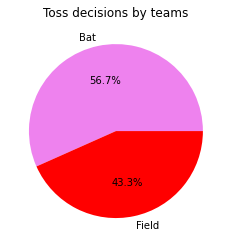

In [30]:
plt.pie(y, labels = x, autopct = '%0.1f%%', colors = ['violet', 'red'] )
plt.title('Toss decisions by teams')
plt.show()

**Top Scorers**

In [35]:
figure = px.bar(data, x = data['top scorer'], y = data['highest score'], color = data["highest score"], title="Top Scorers in t20 World Cup 2022")
figure.show()

Virat Kohli scored the highest in 3 matches. Undoubtedly, he was the best batsman in the t20 world cup 2022

**Number of player of the match awards in the world cup:**

In [37]:
figure = px.bar(data, x = data["player of the match"], title="Player of the Match Awards in t20 World Cup 2022" )
figure.show()

Virat Kohli, Sam Curran, Taskin Ahmed, Suryakumar Yadav, and Shadab Khan got the player of the match in 2 matches. No player got the player of the match award in more than two matches.

**Bowlers with the best bowling figures at the end of the matches**

In [40]:
figure = px.bar(data, 
                x=data["best bowler"],
                title="Best Bowlers in t20 World Cup 2022")
figure.show()

Sam Curran was the only best bowler in 3 matches

**The runs scored in the first innings and second innings in every stadium**

In [41]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=data["venue"],
    y=data["first innings score"],
    name='First Innings Runs',
    marker_color='yellow'
))
fig.add_trace(go.Bar(
    x=data["venue"],
    y=data["second innings score"],
    name='Second Innings Runs',
    marker_color='red'
))
fig.update_layout(barmode='group', 
                  xaxis_tickangle=-45, 
                  title="Best Stadiums to Bat First or Chase")
fig.show()

So SCG was the only stadium in the world cup that was best for batting first

**The number of wickets lost in the first innings and second innings in every stadium**

In [43]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=data["venue"],
    y=data["first innings wickets"],
    name='First Innings Wickets',
    marker_color='pink'
))
fig.add_trace(go.Bar(
    x=data["venue"],
    y=data["second innings wickets"],
    name='Second Innings Wickets',
    marker_color='yellow'
))
fig.update_layout(barmode='group', 
                  xaxis_tickangle=-45, 
                  title="Best Statiums to Bowl First or Defend")
fig.show()

SCG was the best stadium to bowl while defending the target. While the Optus Stadium was the best stadium to bowl first.

**Summary**

1.   England won the most number of matches
2.   Virat Kohli scored highest in the most number of matches
3. Sam Curran was the best bowler in the most number of matches
4. More teams won by batting firs
5. More teams decided to bat first
6. SCG was the best stadium to bat first
7. SCG was the best stadium to defend the target in the World Cup
8. The Optus Stadium was the best stadium to bowl first




**Done By Syed Miran Hussain**